In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import pyplot as plt
import scvelo as scv
import anndata as ad
import seaborn as sns

In [3]:
sc.settings.verbosity=3
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


In [2]:
sc.settings.set_figure_params(dpi=80, figsize=(4,4),facecolor='white')
plt.rcParams['figure.figsize']=(4,4)

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


In [6]:
dinh = sc.read_loom('/home/j87832lw/oviduct/Dinh/all.loom')

In [7]:
dinh.var_names_make_unique()
dinh.obs['Patient']= dinh.obs['Patient'].astype('category')

In [8]:
dinh.obs['Patient']

CellID
SRR11909348:AAAGCAACAATGTAAGx    patient 5
SRR11909348:AAAGCAATCCTGTAGAx    patient 5
SRR11909348:AAAGATGAGCGCCTCAx    patient 5
SRR11909348:AAACCTGGTTCGTTGAx    patient 5
SRR11909348:AAACGGGTCAGAGACGx    patient 5
                                   ...    
SRR11909355:TTTCCTCGTTAAGACAx    patient 8
SRR11909355:TTTGGTTTCACAGTACx    patient 8
SRR11909355:TTTCCTCCAGTTAACCx    patient 8
SRR11909355:TTTGTCAAGCACAGGTx    patient 8
SRR11909355:TTTGTCATCTGCAGTAx    patient 8
Name: Patient, Length: 77789, dtype: category
Categories (7, object): ['patient 1', 'patient 3', 'patient 4', 'patient 5', 'patient 6', 'patient 7', 'patient 8']

In [9]:
ulrich = sc.read_h5ad('/home/j87832lw/oviduct/Ulrich/ulrich_all.h5ad')

In [10]:
ulrich = ulrich[ulrich.obs['Source'] == 'Surgical',:].copy()
ulrich.obs['Patient']= ulrich.obs['Patient'].astype('category')
ulrich.var_names_make_unique()

In [11]:
ulrich.obs['Patient'] = ulrich.obs['Patient'].cat.rename_categories({'FT3': 'patient 9'})
ulrich.obs['Patient'] = ulrich.obs['Patient'].cat.rename_categories({'FT1': 'patient 10'})
ulrich.obs['Patient']

CellID
SRR14804415:AAACGAAAGCAGCACAx    patient 10
SRR14804415:AAAGGATGTGAGCGATx    patient 10
SRR14804415:AAACCCAGTTATCCAGx    patient 10
SRR14804415:AACACACGTGACAACGx    patient 10
SRR14804415:AAATGGAAGTCGAAGCx    patient 10
                                    ...    
SRR14804422:TTTGACTAGTTTCGGTx    patient 10
SRR14804422:TTTGGAGTCTGTCTCGx    patient 10
SRR14804422:TTTGATCTCGATACACx    patient 10
SRR14804422:TTTCGATAGACATCAAx    patient 10
SRR14804422:TTTGGAGCACACTTAGx    patient 10
Name: Patient, Length: 69324, dtype: category
Categories (2, object): ['patient 10', 'patient 9']

In [12]:
hu = sc.read_h5ad('/home/j87832lw/oviduct/Hu/write/hu_raw.h5ad') 

In [13]:
hu.var_names_make_unique()
hu.obs['Patient']= hu.obs['Patient'].astype('category')

In [14]:
hu.obs['Patient'] = hu.obs['Patient'].cat.rename_categories({34350.0: 'patient 11'})
hu.obs['Patient'] = hu.obs['Patient'].cat.rename_categories({34659.0: 'patient 12'})
hu.obs['Patient'] = hu.obs['Patient'].cat.rename_categories({33572.0: 'patient 13'})
hu.obs['Patient'] = hu.obs['Patient'].cat.rename_categories({35773.0: 'patient 14'})
hu.obs['Patient'] = hu.obs['Patient'].cat.rename_categories({33778.0: 'patient 15'})


In [15]:
hu.obs['Patient']

CellID
SRR10307751_A5PYI:SRR10307751.sorted.bam    patient 11
SRR10308571_O4515:SRR10308571.sorted.bam    patient 12
SRR10309079_65AUP:SRR10309079.sorted.bam    patient 12
SRR10308840_R7NCM:SRR10308840.sorted.bam    patient 13
SRR10307936_B7MWB:SRR10307936.sorted.bam    patient 11
                                               ...    
SRR10308725_MAY3G:SRR10308725.sorted.bam    patient 15
SRR10308756_S29MY:SRR10308756.sorted.bam    patient 15
SRR10307827_D4AIG:SRR10307827.sorted.bam    patient 11
SRR10309139_FKI51:SRR10309139.sorted.bam    patient 12
SRR10308566_BT0CU:SRR10308566.sorted.bam    patient 12
Name: Patient, Length: 1845, dtype: category
Categories (5, object): ['patient 13', 'patient 15', 'patient 11', 'patient 12', 'patient 14']

In [16]:
#used anndata concat in the end as dinh.concat(ulrich, hu) etc. was giving errors and join outer i read was good for making sure all genes are kept 

oviduct = ad.concat([ulrich, dinh, hu], axis=0, join='inner')

In [15]:
oviduct.obs['Patient']= oviduct.obs['Patient'].astype('category')

In [17]:
oviduct.obs['Patient']

CellID
SRR14804415:AAACGAAAGCAGCACAx               patient 10
SRR14804415:AAAGGATGTGAGCGATx               patient 10
SRR14804415:AAACCCAGTTATCCAGx               patient 10
SRR14804415:AACACACGTGACAACGx               patient 10
SRR14804415:AAATGGAAGTCGAAGCx               patient 10
                                               ...    
SRR10308725_MAY3G:SRR10308725.sorted.bam    patient 15
SRR10308756_S29MY:SRR10308756.sorted.bam    patient 15
SRR10307827_D4AIG:SRR10307827.sorted.bam    patient 11
SRR10309139_FKI51:SRR10309139.sorted.bam    patient 12
SRR10308566_BT0CU:SRR10308566.sorted.bam    patient 12
Name: Patient, Length: 148958, dtype: category
Categories (14, object): ['patient 1', 'patient 3', 'patient 4', 'patient 5', ..., 'patient 12', 'patient 13', 'patient 14', 'patient 15']

In [18]:
oviduct_concat = '/home/j87832lw/oviduct/oviduct.all/oviduct_concat.h5ad' 
oviduct.write(oviduct_concat)

### preprocessing of all oviduct data

In [ ]:
oviduct = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/oviduct_concat.h5ad')

In [ ]:
oviduct.var['mt']=oviduct.var_names.str.startswith('MT-')

In [ ]:
sc.pp.calculate_qc_metrics(oviduct, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
sc.pl.violin(oviduct, ['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.scatter(oviduct, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(oviduct, x='total_counts', y='n_genes_by_counts')

In [ ]:
sc.pp.filter_cells(oviduct, min_genes=200)
sc.pp.filter_genes(oviduct, min_cells=3)

oviduct=oviduct[oviduct.obs.n_genes_by_counts <8000,:]
oviduct=oviduct[oviduct.obs.total_counts <8500000,:]
oviduct=oviduct[oviduct.obs.pct_counts_mt <30,:]

In [ ]:
sc.pp.normalize_total(oviduct, target_sum=1e4) 

In [ ]:
sc.pp.log1p(oviduct)

In [ ]:
sc.pp.highly_variable_genes(oviduct, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key='Patient')

In [ ]:
sc.pl.highly_variable_genes(oviduct)

In [33]:
oviduct.raw = oviduct

In [34]:
oviduct = oviduct [:, oviduct.var.highly_variable]

In [35]:
sc.pp.scale(oviduct) #max_value=10)

In [36]:
sc.tl.pca(oviduct, svd_solver='arpack')

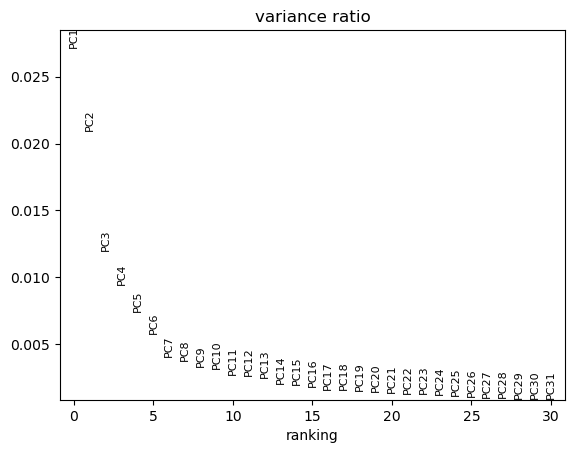

In [37]:
sc.pl.pca_variance_ratio(oviduct)


In [38]:
sc.pp.neighbors(oviduct, n_pcs=9)
sc.tl.leiden(oviduct,resolution=1.7)
sc.tl.paga(oviduct)

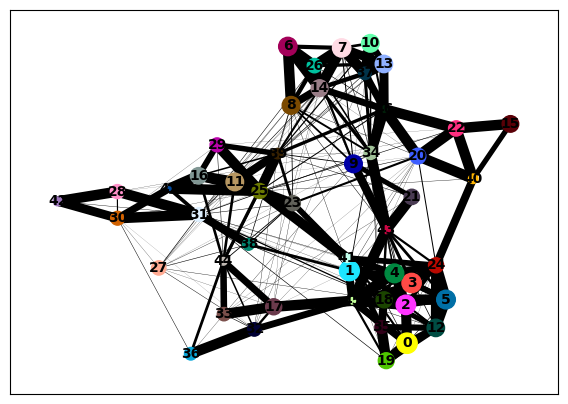

In [39]:
sc.pl.paga(oviduct)

In [40]:
sc.tl.umap(oviduct, init_pos='paga')

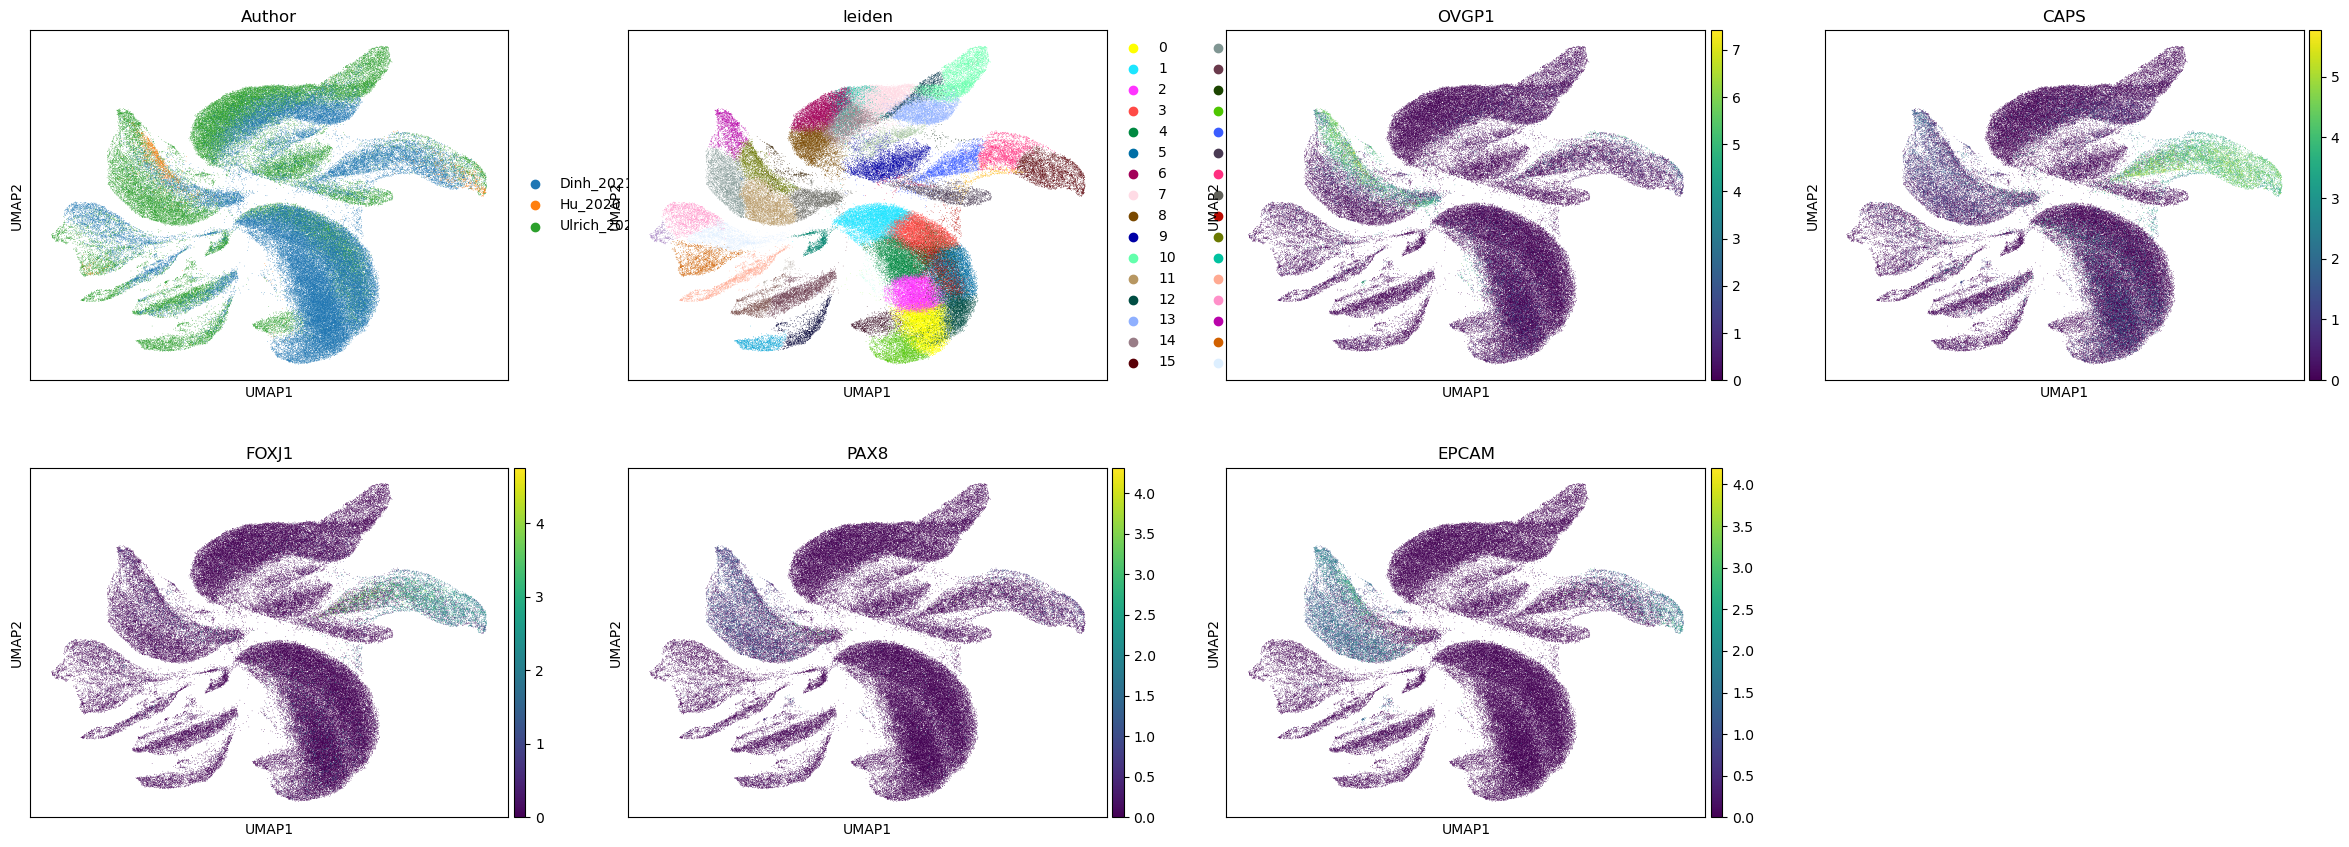

In [41]:
# resolution =1.7
sc.pl.umap(oviduct, color=['Author','leiden','OVGP1','CAPS','FOXJ1','PAX8','EPCAM'])
#can specify iniital positions umap will build on from paga positions 

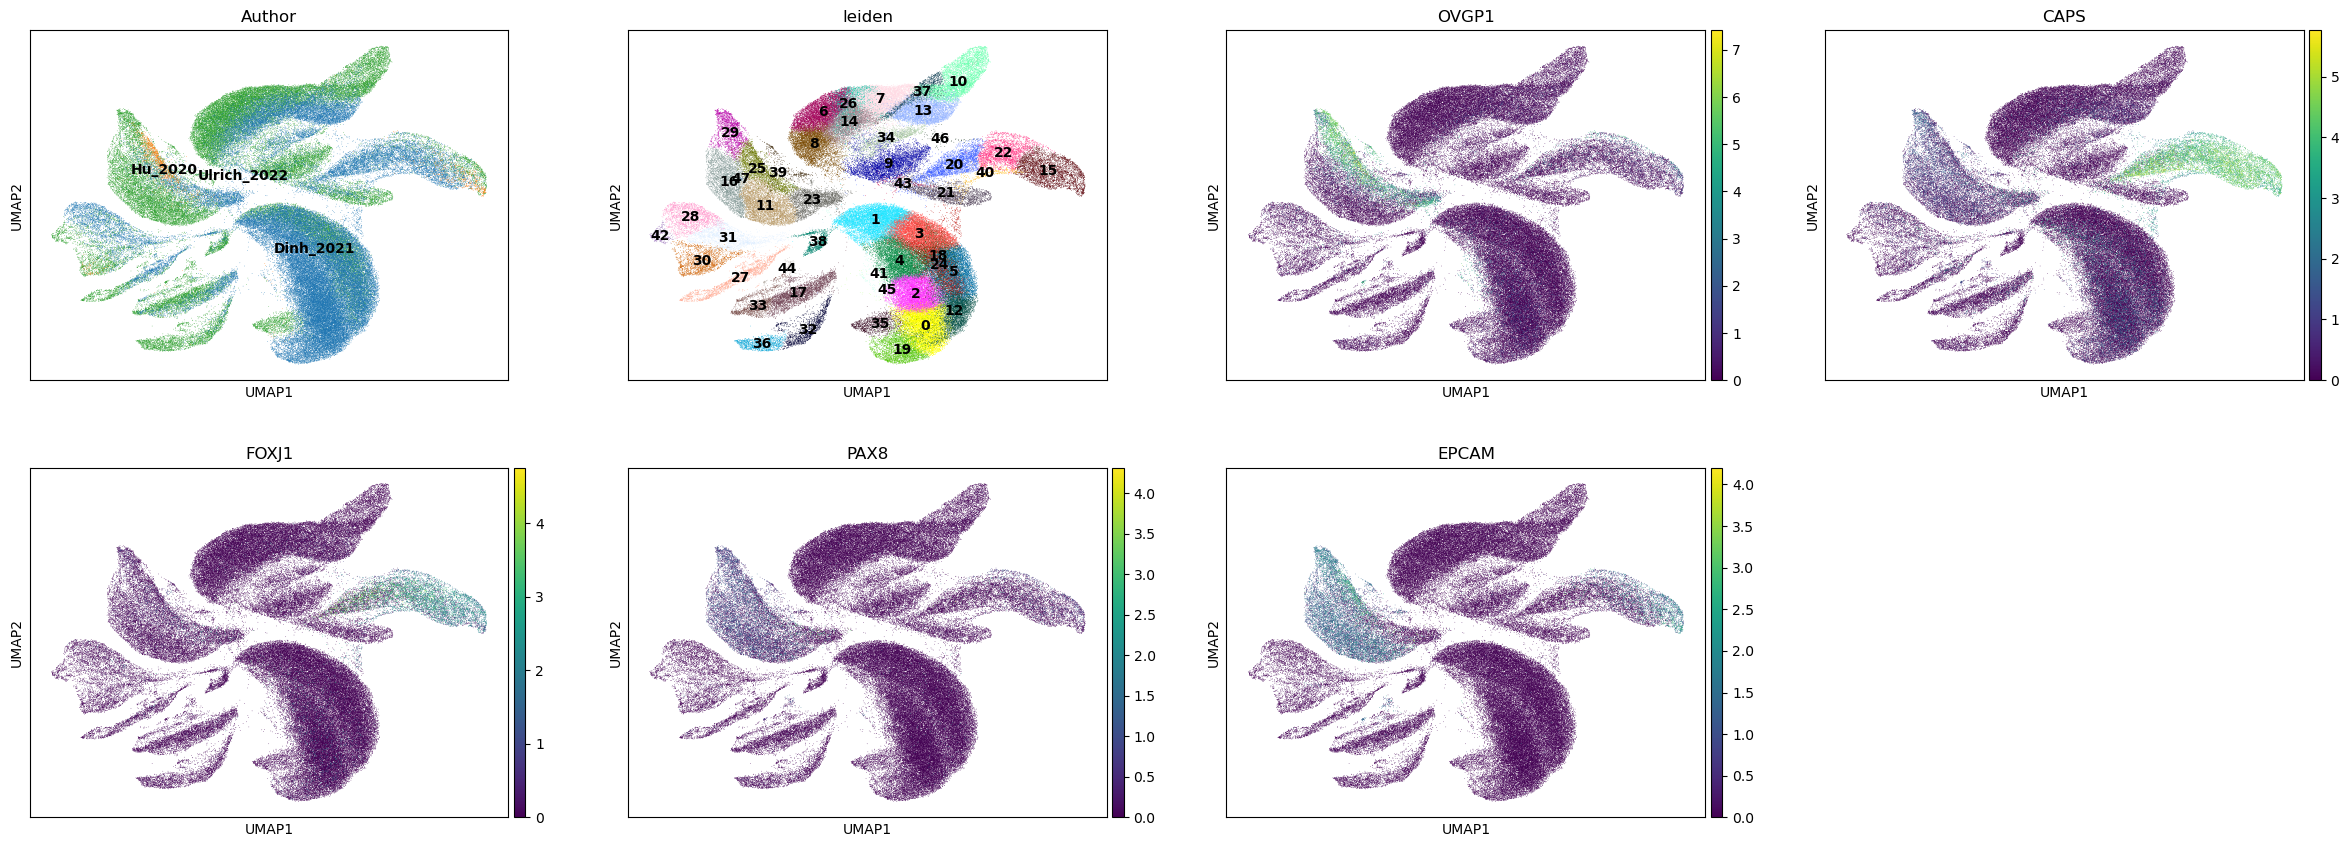

In [42]:
sc.pl.umap(oviduct, legend_loc='on data', color=['Author','leiden','OVGP1','CAPS','FOXJ1','PAX8','EPCAM'])

In [ ]:
## from here remove epithelial cells, and then combat epithelial cells together

In [44]:
cell_dict = {'Other':['0','1','2','3','4','5','6','7','8','9','10','12','13','14','17','18','19','21','24',
                      '26','27','28','30','31','32','33','34','35','36','37','38','41','42','43','44','45'
                     ],
 'Ciliated': ['15','22','20','40','46'], 
 'Secretory': ['23','39','25','29','47'],
            'EPCAM+':['11','16']}

In [45]:
oviduct.obs['Cell_Types'] = np.nan

In [46]:
for i in cell_dict.keys():
    ind = pd.Series(oviduct.obs.leiden).isin(cell_dict[i])
    oviduct.obs.loc[ind,'Cell_Types'] = i

In [47]:
oviductepithelial=oviduct[oviduct.obs['Cell_Types'].isin(['Secretory','Ciliated']),:].copy()

In [48]:
oviduct

AnnData object with n_obs × n_vars = 142339 × 3100
    obs: 'Author', 'BioSample', 'Patient', 'Run', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'umap', 'Author_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [49]:
oviductepithelial

AnnData object with n_obs × n_vars = 17679 × 3100
    obs: 'Author', 'BioSample', 'Patient', 'Run', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'umap', 'Author_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [50]:
## save out concat oviduct epithelial cells here 

results_file = '/home/j87832lw/oviduct/oviduct.all/oviductepithelialconcatthenpp.h5ad'
oviductepithelial.write(results_file)

In [4]:
oviductepithelial = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/oviductepithelialconcatthenpp.h5ad')

In [5]:
#remove the 2 cells without patient names
oviductepithelial = oviductepithelial[~oviductepithelial.obs['Patient'].isnull()]

In [6]:
oviductepithelial

View of AnnData object with n_obs × n_vars = 17674 × 3100
    obs: 'Author', 'BioSample', 'Patient', 'Run', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Author_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
sc.pp.combat(oviductepithelial, key='Patient')

Standardizing Data across genes.

Found 14 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


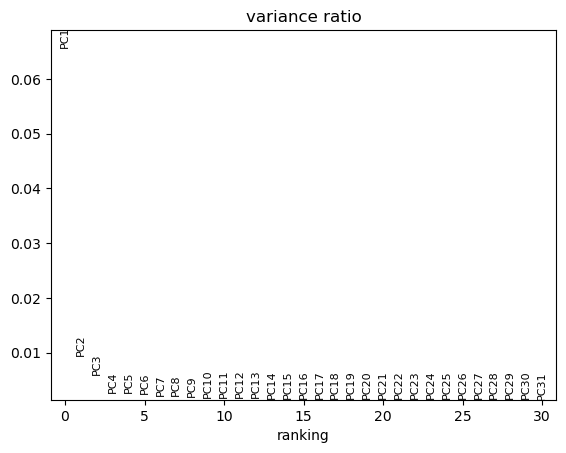

In [8]:
sc.tl.pca(oviductepithelial, svd_solver='arpack')
sc.pl.pca_variance_ratio(oviductepithelial)

In [9]:
sc.pp.neighbors(oviductepithelial, n_neighbors=20, n_pcs=4)
sc.tl.leiden(oviductepithelial)

computing neighbors
    using 'X_pca' with n_pcs = 4
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


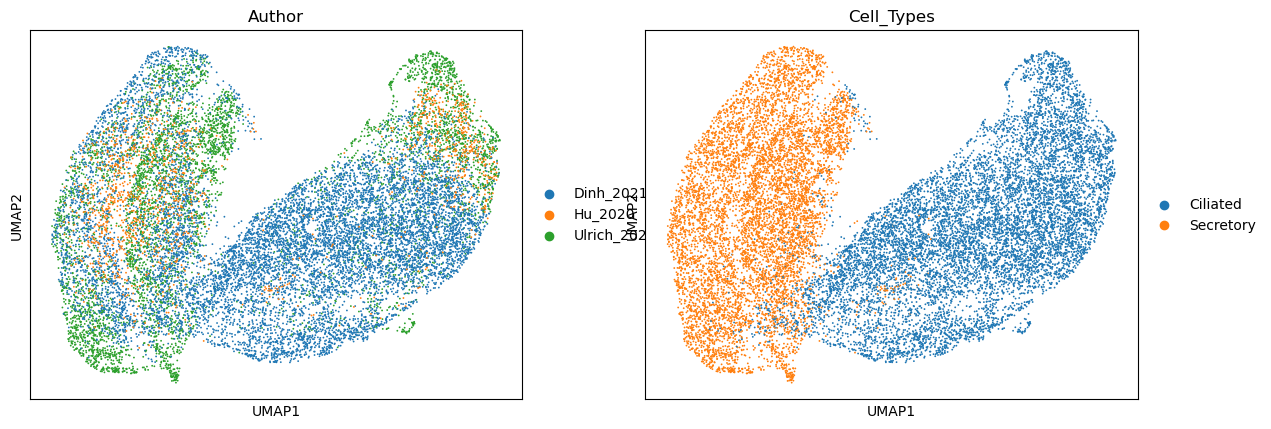

In [10]:
#pcs 4 
sc.tl.umap(oviductepithelial)
sc.pl.umap(oviductepithelial, color=['Author','Cell_Types'])

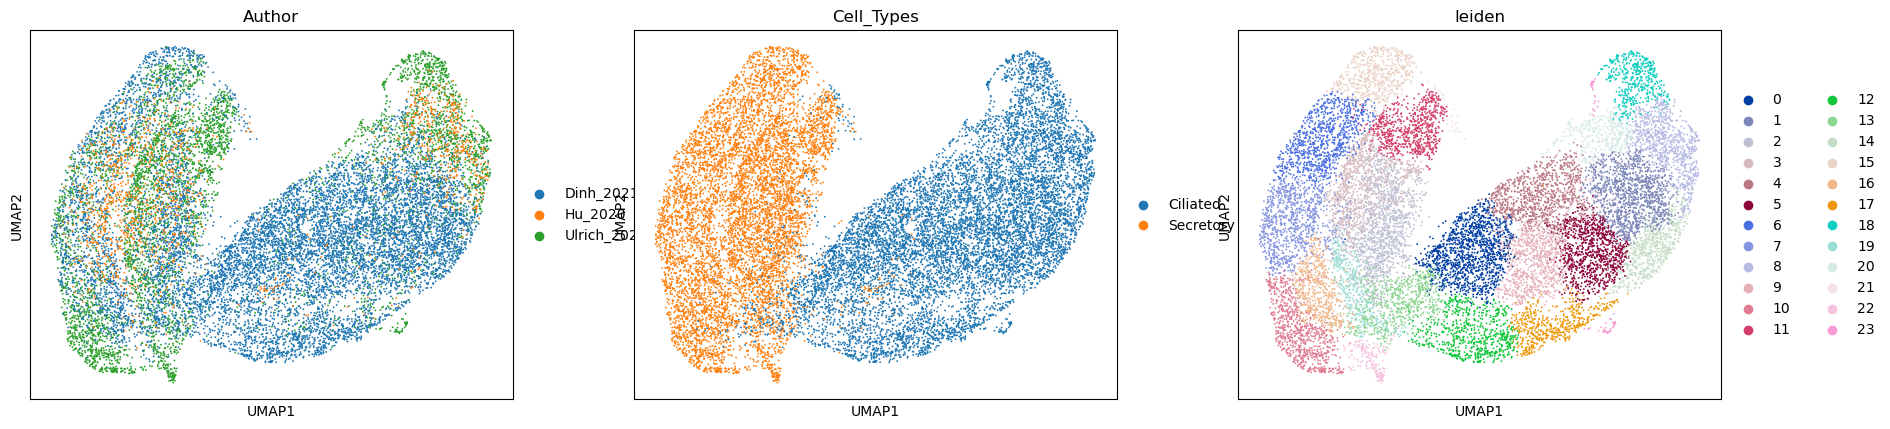

In [11]:
sc.pl.umap(oviductepithelial, color=['Author','Cell_Types','leiden'])

In [12]:
oviduct_epithelial_concat = '/home/j87832lw/oviduct/oviduct.all/oviduct_epithelial_concat.h5ad' 
oviductepithelial.write(oviduct_epithelial_concat)

In [13]:
oviductepithelial = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/oviduct_epithelial_concat.h5ad')

## annotate with further metadata 

In [14]:
menopausal_dict = { 'Proliferative':['patient 1','patient 4','patient 6'],
            'Secretory':['patient 3','patient 5','patient 7','patient 10','patient 12'],
            'Peri-menopausal':['patient 4','patient 9','patient 14','patient 11'],
            'Post-menopausal':['patient 8','patient 13','patient 15'],}

In [15]:
oviductepithelial.obs['menstrual_status'] = np.nan
for i in menopausal_dict.keys():
    ind = pd.Series(oviductepithelial.obs.Patient).isin(menopausal_dict[i])
    oviductepithelial.obs.loc[ind,'menstrual_status'] = i

In [16]:
oviductepithelial.obs['menstrual_status']= oviductepithelial.obs['menstrual_status'].astype('category')
oviductepithelial.obs['menstrual_status']

CellID
SRR14804415:AAACGCTAGAGAGTTTx                     Secretory
SRR14804415:AACCAACCAAATAGCAx                     Secretory
SRR14804415:AACAACCCAGCGTGCTx                     Secretory
SRR14804415:AACAACCAGGTCACTTx                     Secretory
SRR14804415:AAACGAATCTGTCCGTx                     Secretory
                                                 ...       
SRR10308430_KMODB:SRR10308430.sorted.bam          Secretory
SRR10308725_MAY3G:SRR10308725.sorted.bam    Post-menopausal
SRR10308756_S29MY:SRR10308756.sorted.bam    Post-menopausal
SRR10309139_FKI51:SRR10309139.sorted.bam          Secretory
SRR10308566_BT0CU:SRR10308566.sorted.bam          Secretory
Name: menstrual_status, Length: 17674, dtype: category
Categories (4, object): ['Peri-menopausal', 'Post-menopausal', 'Proliferative', 'Secretory']

In [17]:
age_dict = { 47:['patient 1','patient 3'], 41:['patient 4'], 33:['patient 5'],
            31:['patient 6'],
            46:['patient 7','patient 10'],
            62:['patient 8'],
            52:['patient 9'],
            50:['patient 11'],
            45:['patient 12'],
            64:['patient 13'],
            53:['patient 14'],
            55:['patient 15'],}

In [18]:
oviductepithelial.obs['Age'] = np.nan
for i in age_dict.keys():
    ind = pd.Series(oviductepithelial.obs.Patient).isin(age_dict[i])
    oviductepithelial.obs.loc[ind,'Age'] = i

In [19]:
oviductepithelial.obs['Age']= oviductepithelial.obs['Age'].astype('category')
oviductepithelial.obs['Age']

CellID
SRR14804415:AAACGCTAGAGAGTTTx               46.0
SRR14804415:AACCAACCAAATAGCAx               46.0
SRR14804415:AACAACCCAGCGTGCTx               46.0
SRR14804415:AACAACCAGGTCACTTx               46.0
SRR14804415:AAACGAATCTGTCCGTx               46.0
                                            ... 
SRR10308430_KMODB:SRR10308430.sorted.bam    45.0
SRR10308725_MAY3G:SRR10308725.sorted.bam    55.0
SRR10308756_S29MY:SRR10308756.sorted.bam    55.0
SRR10309139_FKI51:SRR10309139.sorted.bam    45.0
SRR10308566_BT0CU:SRR10308566.sorted.bam    45.0
Name: Age, Length: 17674, dtype: category
Categories (12, float64): [31.0, 33.0, 41.0, 45.0, ..., 53.0, 55.0, 62.0, 64.0]

In [20]:
cycleday_dict = {'day 3':['patient 1'],
            'day 17':['patient 3'],
            'day 7':['patient 4'],
            'day 31':['patient 5'],
            'day 13':['patient 6'],
            'day 23':['patient 7'],
            'day 28':['patient 10'],
            'day 37':['patient 9'], 
            'unknown':['patient 11','patient 12','patient 14'],
            'post-menopausal':['patient 8','patient 13','patient 15']}

In [21]:
oviductepithelial.obs['cycle_day'] = np.nan
for i in cycleday_dict.keys():
    ind = pd.Series(oviductepithelial.obs.Patient).isin(cycleday_dict[i])
    oviductepithelial.obs.loc[ind,'cycle_day'] = i

In [22]:
oviductepithelial.obs['cycle_day']= oviductepithelial.obs['cycle_day'].astype('category')
oviductepithelial.obs['cycle_day']

CellID
SRR14804415:AAACGCTAGAGAGTTTx                        day 28
SRR14804415:AACCAACCAAATAGCAx                        day 28
SRR14804415:AACAACCCAGCGTGCTx                        day 28
SRR14804415:AACAACCAGGTCACTTx                        day 28
SRR14804415:AAACGAATCTGTCCGTx                        day 28
                                                 ...       
SRR10308430_KMODB:SRR10308430.sorted.bam            unknown
SRR10308725_MAY3G:SRR10308725.sorted.bam    post-menopausal
SRR10308756_S29MY:SRR10308756.sorted.bam    post-menopausal
SRR10309139_FKI51:SRR10309139.sorted.bam            unknown
SRR10308566_BT0CU:SRR10308566.sorted.bam            unknown
Name: cycle_day, Length: 17674, dtype: category
Categories (10, object): ['day 13', 'day 17', 'day 23', 'day 28', ..., 'day 37', 'day 7', 'post-menopausal', 'unknown']

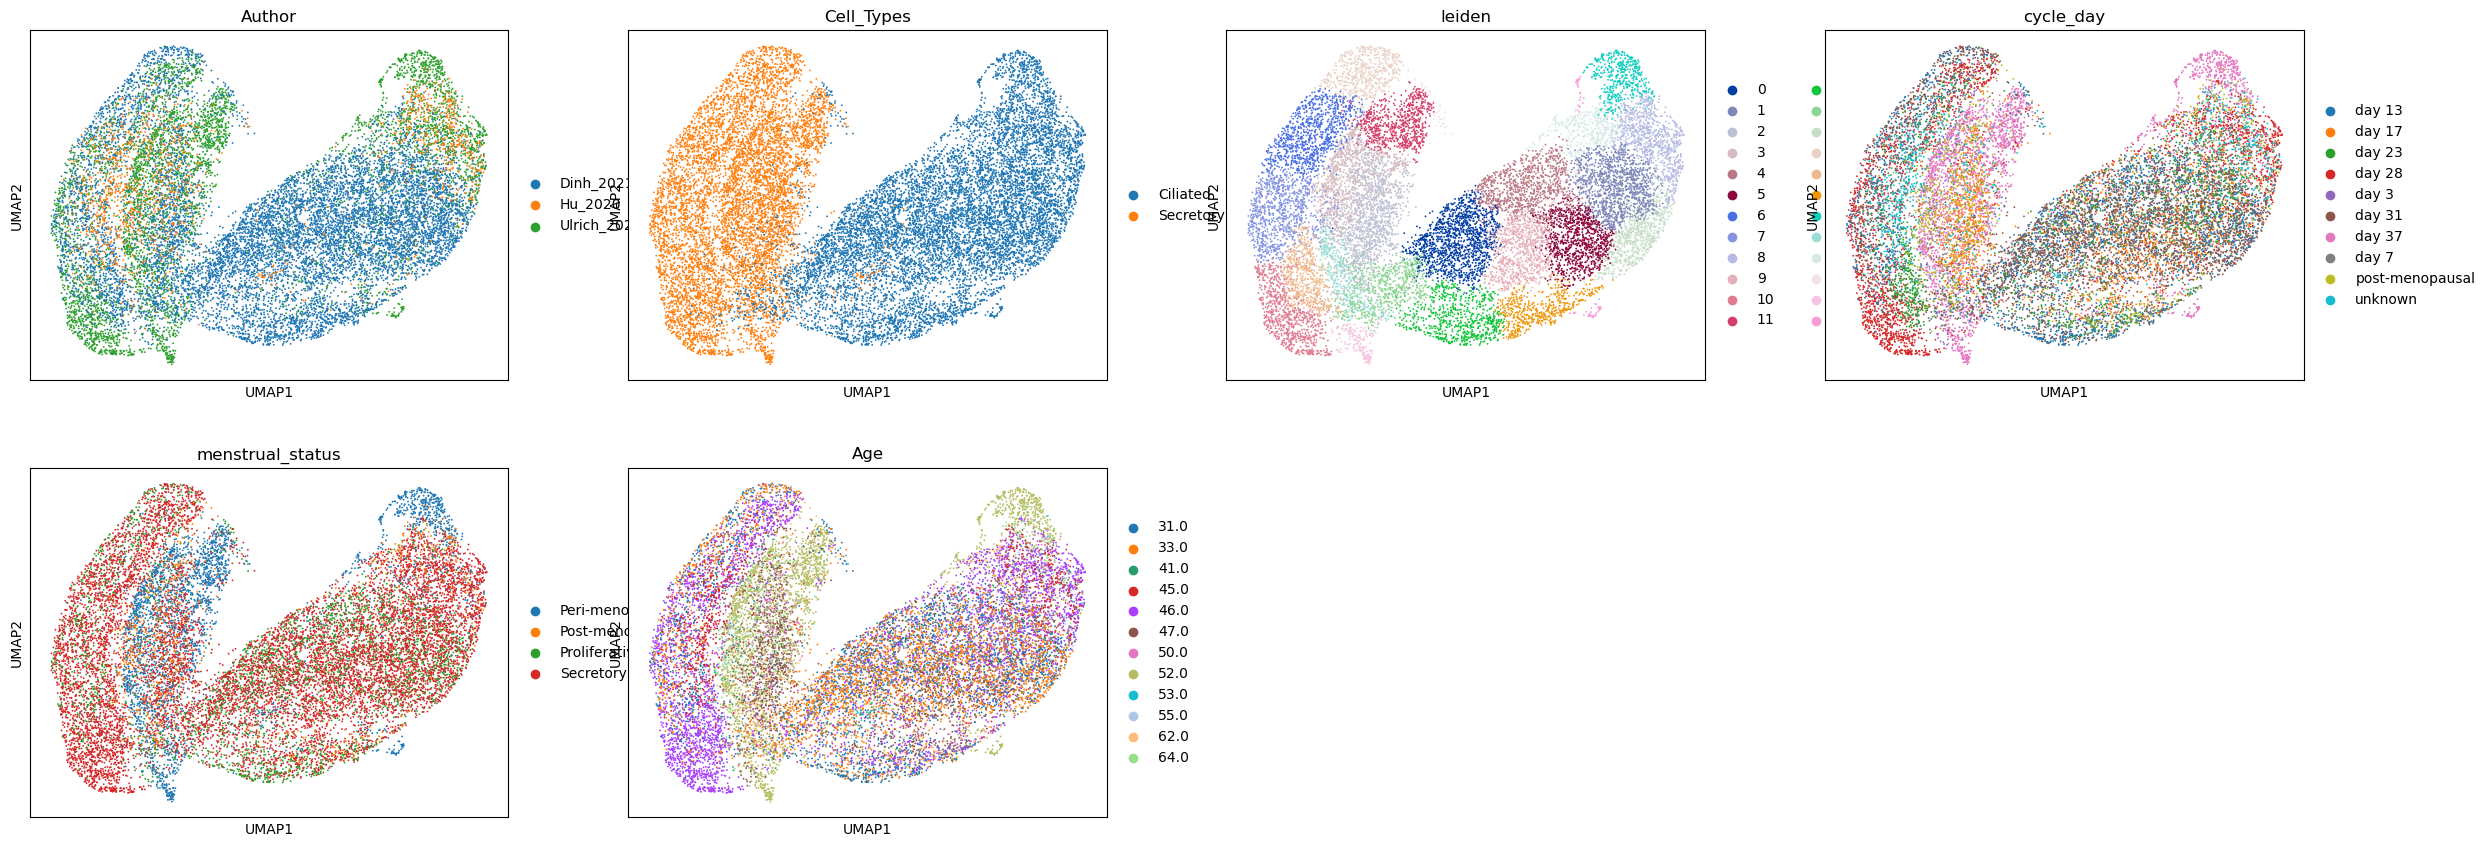

In [23]:
sc.pl.umap(oviductepithelial, color=['Author','Cell_Types','leiden','cycle_day','menstrual_status','Age'])

In [24]:
counts = oviductepithelial.obs.Patient.value_counts()
counts

patient 5     3397
patient 10    3007
patient 9     2823
patient 6     2757
patient 3     1844
patient 7     1532
patient 12     821
patient 13     395
patient 8      312
patient 1      279
patient 4      223
patient 11     142
patient 15     105
patient 14      37
Name: Patient, dtype: int64

## harmony 

In [25]:
sc.tl.pca(oviduct, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


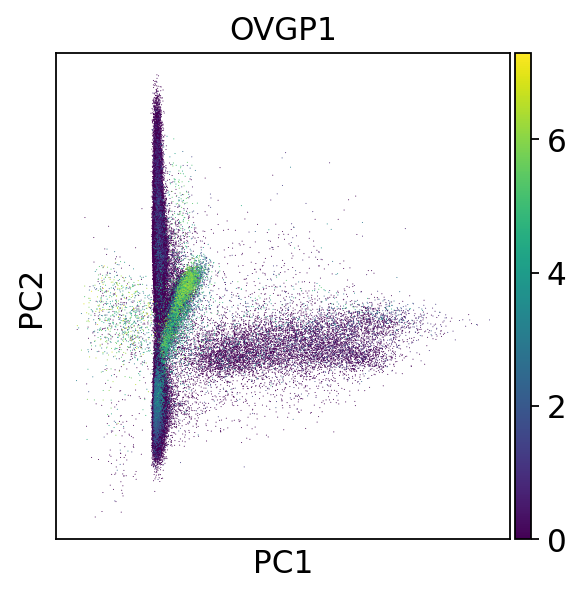

In [26]:
sc.pl.pca(oviduct, color='OVGP1')

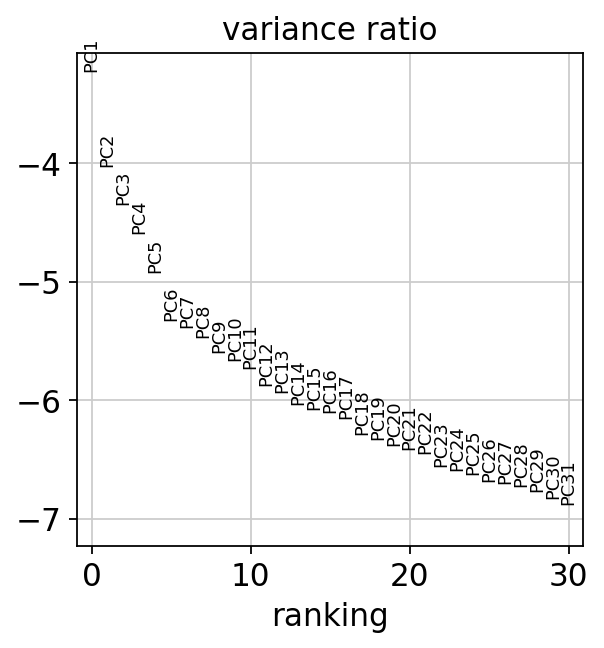

In [27]:
sc.pl.pca_variance_ratio(oviduct, log=True)

In [28]:
sc.pp.neighbors(oviduct, n_neighbors=10, n_pcs=7)


computing neighbors
    using 'X_pca' with n_pcs = 7
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [29]:
sc.tl.umap(oviduct)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:14)


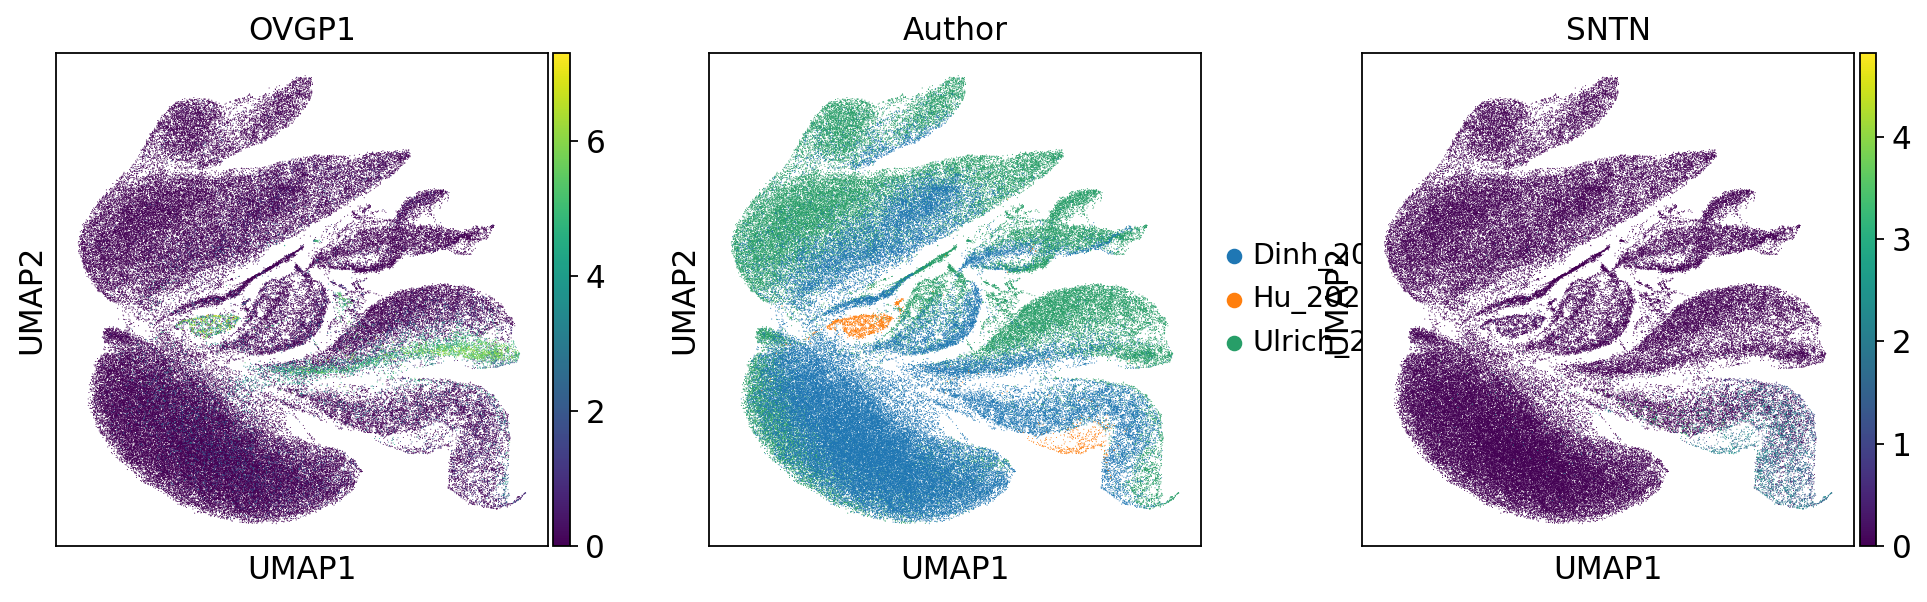

In [30]:
sc.pl.umap(oviduct, color=['OVGP1','Author','SNTN'])

In [ ]:
sce.pp.harmony_integrate(oviduct, 'Run')

2023-05-26 10:05:20,624 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-26 10:05:46,544 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-26 10:05:47,874 - harmonypy - INFO - Iteration 1 of 10
2023-05-26 10:15:07,011 - harmonypy - INFO - Iteration 2 of 10
2023-05-26 10:24:28,823 - harmonypy - INFO - Iteration 3 of 10
2023-05-26 10:33:56,632 - harmonypy - INFO - Iteration 4 of 10
2023-05-26 10:42:27,848 - harmonypy - INFO - Iteration 5 of 10
2023-05-26 10:50:20,717 - harmonypy - INFO - Iteration 6 of 10
2023-05-26 10:57:51,770 - harmonypy - INFO - Iteration 7 of 10
2023-05-26 11:04:40,878 - harmonypy - INFO - Iteration 8 of 10


In [ ]:
oviduct.obsm['X_pca'] = oviduct.obsm['X_pca_harmony']
sc.pp.neighbors(oviduct, n_neighbors=10, n_pcs=8)
sc.tl.umap(oviduct)
sc.tl.leiden(oviduct, resolution=0.5)

In [ ]:
sc.pl.umap(oviduct, color=['leiden','Author'])

In [ ]:
#results_file = '/home/j87832lw/oviduct/oviduct.all/oviduct_clustering_results.h5ad' 
#oviduct_clustering_results.write(results_file)

In [47]:
conda install scvi-tools -c conda-forge

Retrieving notices: ...working... done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/j87832lw/miniconda3/envs/velocity_analysis_pipeline

  added / updated specs:
    - scvi-tools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    absl-py-1.4.0              |     pyhd8ed1ab_0         100 KB  conda-forge
    chex-0.1.7                 |     pyhd8ed1ab_0          70 KB  conda-forge
    contextlib2-21.6.0         |     pyhd8ed1ab_0          16 KB  conda-forge
    dm-tree-0.1.7              |  py310h769672d_0         149 KB  conda-forge
    docrep-0.3.2               |     pyh44b312d_0        